In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('news.csv')

In [4]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
x = df['text']
y = df['label']

In [6]:
x

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [7]:
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [8]:
messages=df.copy()

In [9]:
messages.reset_index(inplace=True)

In [10]:
messages.head(10)

,index,Unnamed: 0,title,text,label
0,0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [11]:
messages['text'][6]

'Share This Baylee Luciani (left), Screenshot of what Baylee caught on FaceTime (right) \nThe closest Baylee Luciani could get to her boyfriend, who’s attending college in Austin, was through video online chat. The couple had regular “dates” this way to bridge the 200-mile distance between them. However, the endearing arrangement quickly came to an end after his FaceTime was left on and caught something that left his girlfriend horrified. \nBaylee had been discussing regular things with her boyfriend, Yale Gerstein, who was on the other side of the screen on an otherwise average evening. This video chat was not unlike all the others she had with Yale from his apartment near Austin Community College until the 19-year-old girlfriend heard some scratching sounds after FaceTime had been left on. \nAccording to KRON , Baylee was mid-conversation with Yale when scratches at the door caught both of their attention and he got up from his bed, where the computer was, to see who was at his door.

In [12]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [13]:
corpus[3]

'kayde king kaydeek novemb lesson tonight dem loss time democrat start listen voter stop run establish candid peopl berni peopl berni novemb dem want tight race work berni walker bragman walkerbragman novemb new york time columnist paul krugman one hillari clinton outspoken surrog contenti democrat primari blame clinton poor perform green parti candid jill stein far receiv neglig number vote nation say stein ralph nader prevent clinton victori account berniesteach threw krugman analysi back face candid issu take respons http co khyouusrf teacher berni berniesteach novemb ana navarro republican recent endors hillari clinton sum preposter natur presidenti elect tweet gop nomin damn candid could lose hillari clinton democrat nomin damn candid could lose trump ana navarro ananavarro novemb popular left wing facebook page pro sander primari respond trump surg simpli post meme sander face text could avoid thank noth dnc meme share almost time less hour post tuesday novemb berni sander endors

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [16]:
X.shape

(6335, 5000)

In [17]:
y=messages['label']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
y_train

2402    REAL
1922    REAL
3475    FAKE
6197    REAL
4748    FAKE
        ... 
4931    REAL
3264    REAL
1653    FAKE
2607    FAKE
2732    REAL
Name: label, Length: 5068, dtype: object

In [19]:
tfidf_v.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abdullah',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absurd',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access',
 'access pipelin',
 'accid']

In [20]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [21]:
count_df = pd.DataFrame(x_train, columns=tfidf_v.get_feature_names())

In [22]:
count_df.head()

,abandon,abc,abc news,abdullah,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zulu
2402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
y_train

2402    REAL
1922    REAL
3475    FAKE
6197    REAL
4748    FAKE
        ... 
4931    REAL
3264    REAL
1653    FAKE
2607    FAKE
2732    REAL
Name: label, Length: 5068, dtype: object

In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(x_train)
tfid_x_test = tfvect.transform(x_test)

In [27]:
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(tfid_x_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [28]:
y_pred = classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.37%


In [29]:
cf = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf)

[[570  45]
 [ 39 613]]


accuracy:   93.37%
Confusion matrix, without normalization


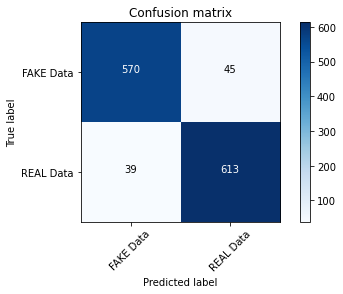

In [30]:
classifier.fit(tfid_x_train, y_train)
pred = classifier.predict(tfid_x_test)
score = accuracy_score(y_test, y_pred)
print(f"accuracy:   {round(score*100,2)}%")
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [31]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

In [32]:
fake_news_det('Hillary’s old strategy was to lie and deny that the FBI even had a criminal investigation underway. Instead her associates insisted that it was a security review. The FBI corrected her and she shrugged it off. But the old breezy denial approach has given way to a savage assault on the FBI. ')

['FAKE']


In [33]:
fake_news_det('In a news conference, Kerry brushed aside criticism that the United States had not sent a more senior official to Paris as â€œquibbling a little bit.â€ He noted that many staffers of the American Embassy in Paris attended')

['REAL']


In [35]:
import pickle
pickle.dump(classifier,open('model.pkl', 'wb'))

In [36]:
# load the model from disk
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [37]:
def fake_news_det1(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    print(prediction)

In [38]:
fake_news_det('Hillary’s old strategy was to lie and deny that the FBI even had a criminal investigation underway. Instead her associates insisted that it was a security review. The FBI corrected her and she shrugged it off. But the old breezy denial approach has given way to a savage assault on the FBI. ')

['FAKE']


In [39]:
fake_news_det('In a news conference, Kerry brushed aside criticism that the United States had not sent a more senior official to Paris as â€œquibbling a little bit.â€ He noted that many staffers of the American Embassy in Paris attended')

['REAL']
